In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms

plt.rcParams['text.latex.preamble']=r"\usepackage{lmodern}"
#Options
params = {'text.usetex' : True,
          'font.size' : 10,
          'font.family' : 'lmodern'
          }
plt.rcParams.update(params) 

In [3]:
def energy_spectrum(u, v, dx=None, n_bins=None):
    N = len(u)
    if dx is None:
        n = int(np.log2(N))
        dx = 1/(2**n-1)
    if n_bins is None:
        n_bins = N // 2
    u_f = np.fft.fft2(u) 
    v_f = np.fft.fft2(v) 
    kx = np.fft.fftfreq(N, d=dx) 
    ky = np.fft.fftfreq(N, d=dx) 
    kx_2d, ky_2d = np.meshgrid(kx, ky, indexing='ij')
    k = np.sqrt(kx_2d**2 + ky_2d**2)
    E_k = 0.5 * (np.abs(u_f)**2 + np.abs(v_f)**2)
    E_k_1 = 0.5 * np.abs(u_f)**2
    E_k_2 = 0.5 * np.abs(v_f)**2

    # Define the bins for radial summation
    bins = np.linspace(0, k.max(), n_bins)
    # bins = np.logspace(-1, int(np.log10(k.max())), n_bins)
    k_bin_centers = 0.5 * (bins[1:] + bins[:-1])
    bin_assignment = np.digitize(k.flatten(), bins, right=True)
    E_k_rad = np.bincount(bin_assignment, weights=E_k.flatten())[:-1]
    E_k_1_rad = np.bincount(bin_assignment, weights=E_k_1.flatten())[:-1]
    E_k_2_rad = np.bincount(bin_assignment, weights=E_k_2.flatten())[:-1]

    return k_bin_centers[1:], E_k_rad[1:], E_k_1_rad[1:], E_k_2_rad[1:]

In [4]:
def plot_energy_spectrum(u, v, dx=None, n_bins=None, chi=None, ylim=[1e-24, 1e12], xlim=[5e-1, 1e3]):
    k_bin_centers, E_k_rad, E_k_1_rad, E_k_2_rad = energy_spectrum(u, v, dx, n_bins)
    k_bin_size = k_bin_centers[1] - k_bin_centers[0]
    print(f"Energy = {k_bin_size*np.sum(E_k_rad)}")
    fig = plt.figure(figsize=(7, 2.8))
    gs = fig.add_gridspec(1, 3)
    ax = gs.subplots(sharex=True, sharey=True)
    ax[0].loglog(k_bin_centers, E_k_1_rad, marker='', markersize=3, ls='--')
    ax[1].loglog(k_bin_centers, E_k_2_rad, marker='', markersize=3, ls='--')
    ax[2].loglog(k_bin_centers, E_k_rad, marker='', markersize=3, ls='--')

    ax[0].set_xlabel(r"Wave Number $\kappa$")
    ax[0].set_ylabel(r"Energy $E(\kappa)$")
    # ax[0].set_ylim(ylim)
    # ax[0].set_xlim(xlim)
    ax[0].grid(True, ls="--", c='0.7')
    ax[0].tick_params(which='both', direction="in")
    ax[1].set_xlabel(r"Wave Number $\kappa$")
    ax[1].tick_params(which='both', direction="in")
    # ax[1].set_ylabel(r"Energy $E(\kappa)$")
    # ax[1].set_ylim([1e-24, 1e12])
    # ax[1].set_xlim([5e-1, 1e3])
    ax[1].grid(True, ls="--", c='0.7')
    ax[2].set_xlabel(r"Wave Number $\kappa$")
    # ax[2].set_ylabel(r"Energy $E(\kappa)$")
    # ax[2].set_ylim([1e-24, 1e12])
    # ax[2].set_xlim([5e-1, 1e3])
    ax[2].grid(True, ls="--", c='0.7')
    ax[2].tick_params(which='both', direction="in")

    ax[0].set_title("x-component")
    ax[1].set_title("y-component")
    ax[2].set_title("both")
    if chi is not None:
        fig.suptitle(r"$\chi = $"+f"{chi}", fontsize=14)

    fig.tight_layout()
    plt.show()

In [5]:
def plot_from_file(path):
    X, Y, u, v = np.load(path, allow_pickle=True)
    plot_energy_spectrum(u, v)

Energy = 45583372263.183846
Energy = 631678573754.432
Energy = 11923608377507.31


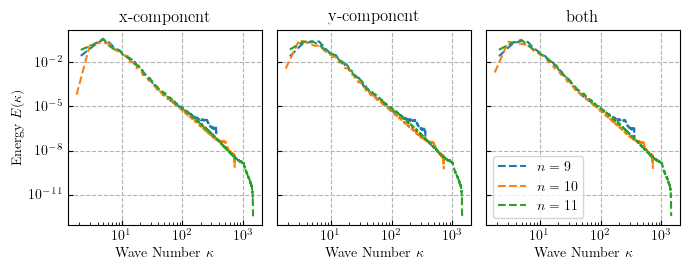

In [9]:
dx = None
n_bins = None
chi = None
fig = plt.figure(figsize=(7, 2.8))
gs = fig.add_gridspec(1, 3)
ax = gs.subplots(sharex=True, sharey=True)

X, Y, u, v = np.load("DT/velocity_9_10000000.0_1.9921875000001854.npy", allow_pickle=True)
k_bin_centers, E_k_rad, E_k_1_rad, E_k_2_rad = energy_spectrum(u, v, dx, n_bins)
k_bin_size = k_bin_centers[1] - k_bin_centers[0]
print(f"Energy = {k_bin_size*np.sum(E_k_rad)}")
ax[0].plot(k_bin_centers, E_k_1_rad/np.sum(E_k_1_rad), marker='', markersize=3, ls='--')
ax[1].plot(k_bin_centers, E_k_2_rad/np.sum(E_k_2_rad), marker='', markersize=3, ls='--')
ax[2].plot(k_bin_centers, E_k_rad/np.sum(E_k_rad), marker='', markersize=3, ls='--', label=r'$n=9$')

k_DT_n9 = k_bin_centers
E_k_DT_n9 = E_k_rad/np.sum(E_k_rad)

X, Y, u, v = np.load("DT/velocity_10_10000000.0_1.992187500000319.npy", allow_pickle=True)
k_bin_centers, E_k_rad, E_k_1_rad, E_k_2_rad = energy_spectrum(u, v, dx, n_bins=600)
k_bin_size = k_bin_centers[1] - k_bin_centers[0]
print(f"Energy = {k_bin_size*np.sum(E_k_rad)}")
ax[0].plot(k_bin_centers, E_k_1_rad/np.sum(E_k_1_rad), marker='', markersize=3, ls='--')
ax[1].plot(k_bin_centers, E_k_2_rad/np.sum(E_k_2_rad), marker='', markersize=3, ls='--')
ax[2].plot(k_bin_centers, E_k_rad/np.sum(E_k_rad), marker='', markersize=3, ls='--', label=r'$n=10$')

k_DT_n10 = k_bin_centers
E_k_DT_n10 = E_k_rad/np.sum(E_k_rad)

X, Y, u, v = np.load("DT/velocity_11_10000000.0_1.992187499999258.npy", allow_pickle=True)
k_bin_centers, E_k_rad, E_k_1_rad, E_k_2_rad = energy_spectrum(u, v, dx, n_bins)
k_bin_size = k_bin_centers[1] - k_bin_centers[0]
print(f"Energy = {k_bin_size*np.sum(E_k_rad)}")
ax[0].plot(k_bin_centers, E_k_1_rad/np.sum(E_k_1_rad), marker='', markersize=3, ls='--')
ax[1].plot(k_bin_centers, E_k_2_rad/np.sum(E_k_2_rad), marker='', markersize=3, ls='--')
ax[2].plot(k_bin_centers, E_k_rad/np.sum(E_k_rad), marker='', markersize=3, ls='--', label=r'$n=11$')

k_DT_n11 = k_bin_centers
E_k_DT_n11 = E_k_rad/np.sum(E_k_rad)

# X, Y, u, v = np.load("DT/velocity_12_10000000.0_1.992187499998723.npy", allow_pickle=True)
# k_bin_centers, E_k_rad, E_k_1_rad, E_k_2_rad = energy_spectrum(u, v, dx, n_bins)
# k_bin_size = k_bin_centers[1] - k_bin_centers[0]
# print(f"Energy = {k_bin_size*np.sum(E_k_rad)}")
# ax[0].plot(k_bin_centers, E_k_1_rad/np.sum(E_k_1_rad), marker='', markersize=3, ls='--')
# ax[1].plot(k_bin_centers, E_k_2_rad/np.sum(E_k_2_rad), marker='', markersize=3, ls='--')
# ax[2].plot(k_bin_centers, E_k_rad/np.sum(E_k_rad), marker='', markersize=3, ls='--', label=r'$n=12$')
# ax[2].loglog(k_bin_centers, k_bin_centers**-3*np.log(k_bin_centers)**(-1/3), marker='o', markersize=3, ls='--')

# ax[2].loglog(k_bin_centers, k_bin_centers**(-5/3))

ax[0].set_xlabel(r"Wave Number $\kappa$")
ax[0].set_ylabel(r"Energy $E(\kappa)$")
# ax[0].set_ylim(ylim)
# ax[0].set_xlim(xlim)
ax[0].grid(True, ls="--", c='0.7')
ax[0].tick_params(which='both', direction="in")
ax[1].set_xlabel(r"Wave Number $\kappa$")
ax[1].tick_params(which='both', direction="in")
# ax[1].set_ylabel(r"Energy $E(\kappa)$")
# ax[1].set_ylim([1e-24, 1e12])
# ax[1].set_xlim([5e-1, 1e3])
ax[1].grid(True, ls="--", c='0.7')
ax[2].set_xlabel(r"Wave Number $\kappa$")
# ax[2].set_ylabel(r"Energy $E(\kappa)$")
# ax[2].set_ylim([1e-24, 1e12])
# ax[2].set_xlim([5e-1, 1e3])
ax[2].grid(True, ls="--", c='0.7')
ax[2].tick_params(which='both', direction="in")
ax[2].legend()

ax[0].set_yscale('log')
ax[1].set_yscale('log')
ax[2].set_yscale('log')
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[2].set_xscale('log')

ax[0].set_title("x-component")
ax[1].set_title("y-component")
ax[2].set_title("both")
if chi is not None:
    fig.suptitle(r"$\chi = $"+f"{chi}", fontsize=14)

fig.tight_layout()
plt.show()

Energy = 7541581576.9441395
Energy = 120580459532.65616
Energy = 1928840061998.1948


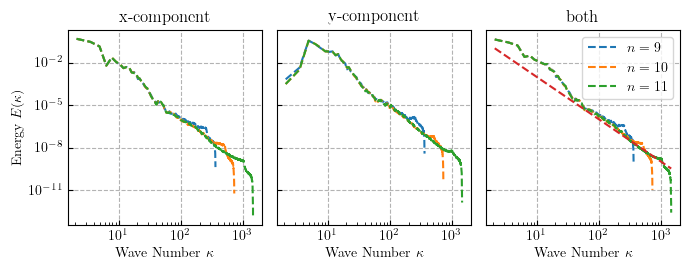

In [10]:
dx = None
n_bins = None
chi = None
fig = plt.figure(figsize=(7, 2.8))
gs = fig.add_gridspec(1, 3)
ax = gs.subplots(sharex=True, sharey=True)

X, Y, u, v = np.load("DJ/velocity_9_10000000.0_1.9921875000001854.npy", allow_pickle=True)
k_bin_centers, E_k_rad, E_k_1_rad, E_k_2_rad = energy_spectrum(u, v, dx, n_bins)
k_bin_size = k_bin_centers[1] - k_bin_centers[0]
print(f"Energy = {k_bin_size*np.sum(E_k_rad)}")
ax[0].plot(k_bin_centers, E_k_1_rad/np.sum(E_k_1_rad), marker='', markersize=3, ls='--')
ax[1].plot(k_bin_centers, E_k_2_rad/np.sum(E_k_2_rad), marker='', markersize=3, ls='--')
ax[2].plot(k_bin_centers, E_k_rad/np.sum(E_k_rad), marker='', markersize=3, ls='--', label=r'$n=9$')

k_DJ_n9 = k_bin_centers
E_k_DJ_n9 = E_k_rad/np.sum(E_k_rad)

X, Y, u, v = np.load("DJ/velocity_10_10000000.0_1.992187500000319.npy", allow_pickle=True)
k_bin_centers, E_k_rad, E_k_1_rad, E_k_2_rad = energy_spectrum(u, v, dx, n_bins)
k_bin_size = k_bin_centers[1] - k_bin_centers[0]
print(f"Energy = {k_bin_size*np.sum(E_k_rad)}")
ax[0].plot(k_bin_centers, E_k_1_rad/np.sum(E_k_1_rad), marker='', markersize=3, ls='--')
ax[1].plot(k_bin_centers, E_k_2_rad/np.sum(E_k_2_rad), marker='', markersize=3, ls='--')
ax[2].plot(k_bin_centers, E_k_rad/np.sum(E_k_rad), marker='', markersize=3, ls='--', label=r'$n=10$')

k_DJ_n10 = k_bin_centers
E_k_DJ_n10 = E_k_rad/np.sum(E_k_rad)

X, Y, u, v = np.load("DJ/velocity_11_10000000.0_1.992187499999258.npy", allow_pickle=True)
k_bin_centers, E_k_rad, E_k_1_rad, E_k_2_rad = energy_spectrum(u, v, dx, n_bins)
k_bin_size = k_bin_centers[1] - k_bin_centers[0]
print(f"Energy = {k_bin_size*np.sum(E_k_rad)}")
ax[0].plot(k_bin_centers, E_k_1_rad/np.sum(E_k_1_rad), marker='', markersize=3, ls='--')
ax[1].plot(k_bin_centers, E_k_2_rad/np.sum(E_k_2_rad), marker='', markersize=3, ls='--')
ax[2].plot(k_bin_centers, E_k_rad/np.sum(E_k_rad), marker='', markersize=3, ls='--', label=r'$n=11$')

k_DJ_n11 = k_bin_centers
E_k_DJ_n11 = E_k_rad/np.sum(E_k_rad)

# X, Y, u, v = np.load("DJ/velocity_12_500000.0_1.992187499998723.npy", allow_pickle=True)
# k_bin_centers, E_k_rad, E_k_1_rad, E_k_2_rad = energy_spectrum(u, v, dx, n_bins)
# k_bin_size = k_bin_centers[1] - k_bin_centers[0]
# print(f"Energy = {k_bin_size*np.sum(E_k_rad)}")
# ax[0].plot(k_bin_centers, E_k_1_rad/np.sum(E_k_1_rad), marker='', markersize=3, ls='--')
# ax[1].plot(k_bin_centers, E_k_2_rad/np.sum(E_k_2_rad), marker='', markersize=3, ls='--')
# ax[2].plot(k_bin_centers, E_k_rad/np.sum(E_k_rad), marker='', markersize=3, ls='--', label=r'$n=12$')
# ax[2].loglog(k_bin_centers, k_bin_centers**-3*np.log(k_bin_centers)**(-1/3), marker='', markersize=3, ls='--')
ax[2].loglog(k_bin_centers, k_bin_centers**-3, marker='', markersize=3, ls='--')

# ax[2].loglog(k_bin_centers, k_bin_centers**(-5/3))

ax[0].set_xlabel(r"Wave Number $\kappa$")
ax[0].set_ylabel(r"Energy $E(\kappa)$")
# ax[0].set_ylim(ylim)
# ax[0].set_xlim(xlim)
ax[0].grid(True, ls="--", c='0.7')
ax[0].tick_params(which='both', direction="in")
ax[1].set_xlabel(r"Wave Number $\kappa$")
ax[1].tick_params(which='both', direction="in")
# ax[1].set_ylabel(r"Energy $E(\kappa)$")
# ax[1].set_ylim([1e-24, 1e12])
# ax[1].set_xlim([5e-1, 1e3])
ax[1].grid(True, ls="--", c='0.7')
ax[2].set_xlabel(r"Wave Number $\kappa$")
# ax[2].set_ylabel(r"Energy $E(\kappa)$")
# ax[2].set_ylim([1e-24, 1e12])
# ax[2].set_xlim([5e-1, 1e3])
ax[2].grid(True, ls="--", c='0.7')
ax[2].tick_params(which='both', direction="in")
ax[2].legend()

ax[0].set_yscale('log')
ax[1].set_yscale('log')
ax[2].set_yscale('log')
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[2].set_xscale('log')

ax[0].set_title("x-component")
ax[1].set_title("y-component")
ax[2].set_title("both")
if chi is not None:
    fig.suptitle(r"$\chi = $"+f"{chi}", fontsize=14)

fig.tight_layout()
plt.show()

/var/folders/by/tjkhpdvj401cj92bnwvg228h0000gn/T/ipykernel_79430/2989897189.py:70: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


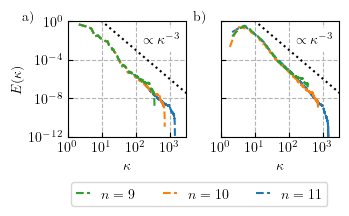

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(3.5, 1.5), sharey=True,  gridspec_kw={'wspace': 0.3})

x_min = 1e0
x_max = 3e3

# LEFT
ax[0].plot(k_DJ_n11, E_k_DJ_n11, marker='', ls='--', label=r"$n=11$")
ax[0].plot(k_DJ_n10, E_k_DJ_n10, marker='', ls='--', label=r"$n=10$")
ax[0].plot(k_DJ_n9, E_k_DJ_n9, marker='', ls='--', label=r"$n=9$")
ax[0].plot(np.logspace(0, 4, 100), 1e3*np.logspace(0, 4, 100)**-3, c="black", ls='dotted')
ax[0].set_xlabel(r"$\kappa$")
ax[0].set_ylabel(r"$E(\kappa)$")
ax[0].xaxis.grid(True, which="major", ls="--", c='0.7')
ax[0].yaxis.grid(True, which="both", ls="--", c='0.7')
trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig.dpi_scale_trans)
ax[0].text(-0.15, 0.9, "a)", transform=ax[0].transAxes + trans, fontsize='medium', va='bottom', fontfamily='serif')
t = ax[0].text(0.871, 0.7, r"$\propto\kappa^{-3}$", transform=ax[0].transAxes + trans, fontsize='medium', va='bottom', fontfamily='serif')
t.set_bbox(dict(facecolor='white', alpha=1, lw=0))
ax[0].set_yscale('log')
ax[0].set_xscale('log')
ax[0].tick_params(which='both', direction="in")
ax[0].set_ylim([1e-12, 1e0])
ax[0].set_xlim([x_min, x_max])
ax[0].set_xticks([1e0, 1e1, 1e2, 1e3])

# RIGHT
ax[1].plot(k_DT_n11, E_k_DT_n11, marker='', ls='--', label=r"$n=11$")
ax[1].plot(k_DT_n10, E_k_DT_n10, marker='', ls='--', label=r"$n=10$")
ax[1].plot(k_DT_n9, E_k_DT_n9, marker='', ls='--', label=r"$n=9$")
ax[1].plot(np.logspace(0, 4, 100), 1e3*np.logspace(0, 4, 100)**-3, c="black", ls='dotted')
ax[1].set_xlabel(r"$\kappa$")
# ax[1].set_ylabel(r"$E(\kappa)$")
ax[1].xaxis.grid(True, which="major", ls="--", c='0.7')
ax[1].yaxis.grid(True, which="both", ls="--", c='0.7')
trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig.dpi_scale_trans)
ax[1].text(0, 0.9, "b)", transform=ax[1].transAxes + trans, fontsize='medium', va='bottom', fontfamily='serif')
t = ax[1].text(0.871, 0.7, r"$\propto\kappa^{-3}$", transform=ax[1].transAxes + trans, fontsize='medium', va='bottom', fontfamily='serif')
t.set_bbox(dict(facecolor='white', alpha=1, lw=0))
ax[1].set_yscale('log')
ax[1].set_xscale('log')
ax[1].tick_params(which='both', direction="in")
ax[1].set_xlim([x_min, x_max])
ax[1].set_xticks([1e0, 1e1, 1e2, 1e3])


# BOTTOM RIGHT (1, 1)
# ax[1, 1].plot(time_list_28, overlap_v_28, label=r"$\epsilon=0.1$")
# ax[1, 1].plot(time_list_60, overlap_v_60, label=r"$\epsilon=0.01$")
# ax[1, 1].plot(time_list_107, overlap_v_107, label=r"$\epsilon=0.001$")
# ax[1, 1].plot(t_list, approx_list_09, c="tab:blue", ls="dotted")
# ax[1, 1].plot(t_list, approx_list_099, c="tab:orange", ls="dotted")
# ax[1, 1].plot(t_list, approx_list_0999, c="tab:green", ls="dotted")
# ax[1, 1].set_ylabel(r"$\langle u_2^\mathrm{DNS} | u_2^\mathrm{QIS} \rangle$")
# ax[1, 1].set_xlabel("Time")
# ax[1, 1].xaxis.grid(True, which="both", ls="--", c='0.7')
# ax[1, 1].yaxis.grid(True, which="both", ls="--", c='0.7')
# ax[1, 1].tick_params(which='both', direction="in")
# trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig.dpi_scale_trans)
# ax[1, 1].text(-0.15, 0.9, "d)", transform=ax[1, 1].transAxes + trans, fontsize='medium', va='bottom', fontfamily='serif')
# ax[1, 1].set_xlim([0, 2])
# ax[1, 1].set_xticks([0, 1, 2])
# ax[1, 1].set_xticks([0.5, 1.5], minor=True)
# ax[1, 1].set_ylim([0, 1.05])
# ax[1, 1].set_yticks([0, 0.5, 1])
# ax[1, 1].set_yticks([0.25, 0.75], minor=True)

# GENERAL SETTINGS

fig.legend(ax[0].get_legend_handles_labels()[0][::-1], ax[0].get_legend_handles_labels()[1][::-1], loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3, fancybox=True, handlelength=1) #, handletextpad=0.2, columnspacing=0.8)
fig.tight_layout()

plt.savefig(f"grid_convergence.pdf", bbox_inches="tight")

In [12]:
from scipy.sparse.linalg import svds as truncated_svd
from scipy.linalg import svd as plain_svd
import sys


def svd(mat, chi=None):
    min_dim = np.min(mat.shape)
    if chi == None or chi >= min_dim:   # plain svd
        U, S, V = plain_svd(mat, full_matrices=False)
        S = np.diag(S)
    else:   # truncated svd
        chi_k = min_dim-1
        if chi < chi_k:
            chi_k = chi
        U, S, V = truncated_svd(mat, chi_k)
        S = np.diag(S)

    return U, S, V

def get_A_index(binary):
    # get index in original array A
    # binary = sig_1^x sig_1^y ... sig_n_bits^x sig_n_bits^y
    # A_index = sig_1^x sig_2^x ... sig_n_bits^x sig_1^y sig_2^y ... sig_n_bits^y
    return int(binary[::2]+binary[1::2], 2)


def convert_to_MPS2D(A, chi=None):  
    # converts scalar field to scale-resolved MPS matrices
    Nx, Ny = A.shape            # Get number of points (Nx equals Ny)
    n = int(np.log2(Nx))        # Get number of (qu)bits
    A_vec = A.reshape((1, -1))  # Flatten function
    
    # Reshape into scale resolving representation B
    w = '0'*2*n                                 # index sig_1^x sig_1^y ... sig_n_bits^x sig_n_bits^y
    B_vec = np.zeros(4**n).reshape((1, -1))     # similar to F but with scale indices

    for _ in range(4**n):
        A_index = get_A_index(w)                # get original index for w
        B_index = int(w, 2)                     # get corresponding index for w
        w = bin(B_index+1)[2:].zfill(2*n)       # set w += 1 in binary
        B_vec[0, B_index] = A_vec[0, A_index]   

    node = B_vec    # set first node of MPS
    MPS = []        # create MPS as list of matrices

    for _ in range(n-1):
        m, n = node.shape
        node = node.reshape((4*m, int(n/4)))
        U, S, V = svd(node, chi)        # svd
        MPS.append(U)                   # save U as first node of MPS
        node = np.matmul(S, V)          # create remaining matrix S*V for next expansion step

    m, n = node.shape
    node = node.reshape((4*m, int(n/4)))
    MPS.append(node)    # add last node to MPS

    return MPS


def convert_to_VF2D(MPS):   
    # converts scale-resolved MPS matrices to scalar field
    n_bits = len(MPS)
    N = 2**n_bits
    node_L = MPS[0]
    for i in range(1, n_bits):
        m, n = node_L.shape
        node_R = MPS[i].reshape((n, -1))
        node_L = np.matmul(node_L, node_R)
        m, n = node_L.shape
        node_L = node_L.reshape((4*m, int(n/4)))
    B_vec = node_L.reshape((1, -1)) 

    w = '0'*2*n_bits                            # index sig_1^x sig_1^y ... sig_n_bits^x sig_n_bits^y
    A_vec = np.zeros(4**n_bits).reshape((1, -1))     # similar to B but with dimensional indices

    for _ in range(4**n_bits):
        A_index = get_A_index(w)             
        B_index = int(w, 2)                   
        w = bin(B_index+1)[2:].zfill(2*n_bits)     
        A_vec[0, A_index]  = B_vec[0, B_index]

    return A_vec.reshape((N, N))


def convert_MPS_to_numpy(tensor_list, dim_p):
    arrays = []
    for tensor in tensor_list:
        m, n = tensor.shape
        dim_left_bond = int(m/dim_p)
        dim_right_bond = n
        data = tensor.reshape((dim_left_bond, dim_p, dim_right_bond))
        arrays.append(data)
    
    return arrays


def convert_numpy_to_MPS(mps):
    arrays = []
    for tensor in mps:
        l, p, r = tensor.shape
        arrays.append(tensor.reshape((l*p, r)))

    return arrays


Energy = 119131546578.10442
Energy = 109285046059.43988
Energy = 115732366519.14198
Energy = 118398431618.96318


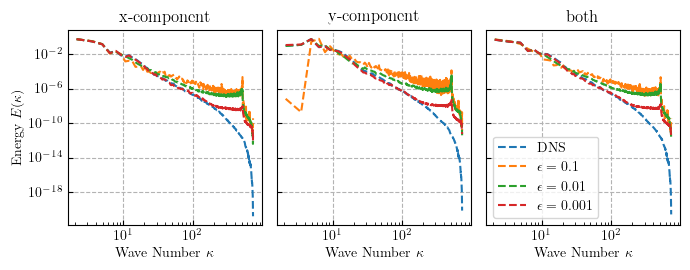

In [16]:
dx = None
n_bins = None
chi = None
fig = plt.figure(figsize=(7, 2.8))
gs = fig.add_gridspec(1, 3)
ax = gs.subplots(sharex=True, sharey=True)

X, Y, u, v = np.load("/Users/Q556220/dev/TN_CFD/2D_TDJ/quimb/energy_spectrum/DJ/QIS_DNS/velocity_10_1000_1.992187500000319.npy", allow_pickle=True)
k_bin_centers, E_k_rad, E_k_1_rad, E_k_2_rad = energy_spectrum(u, v, dx, n_bins)
k_bin_size = k_bin_centers[1] - k_bin_centers[0]
print(f"Energy = {k_bin_size*np.sum(E_k_rad)}")
ax[0].plot(k_bin_centers, E_k_1_rad/np.sum(E_k_1_rad), marker='', markersize=3, ls='--')
ax[1].plot(k_bin_centers, E_k_2_rad/np.sum(E_k_2_rad), marker='', markersize=3, ls='--')
ax[2].plot(k_bin_centers, E_k_rad/np.sum(E_k_rad), marker='', markersize=3, ls='--', label=r'DNS')

k_DJ_DNS = k_bin_centers
E_k_DJ_DNS = E_k_rad/np.sum(E_k_rad)

u_mps = np.load("/Users/Q556220/dev/TN_CFD/2D_TDJ/quimb/energy_spectrum/DJ/QIS_DNS/data_10_16_1000/u_time_1.99219.npy", allow_pickle=True)
v_mps = np.load("/Users/Q556220/dev/TN_CFD/2D_TDJ/quimb/energy_spectrum/DJ/QIS_DNS/data_10_16_1000/v_time_1.99219.npy", allow_pickle=True)
u = convert_to_VF2D(convert_numpy_to_MPS(u_mps))
v = convert_to_VF2D(convert_numpy_to_MPS(v_mps))
k_bin_centers, E_k_rad, E_k_1_rad, E_k_2_rad = energy_spectrum(u, v, dx, n_bins)
k_bin_size = k_bin_centers[1] - k_bin_centers[0]
print(f"Energy = {k_bin_size*np.sum(E_k_rad)}")
ax[0].plot(k_bin_centers, E_k_1_rad/np.sum(E_k_1_rad), marker='', markersize=3, ls='--')
ax[1].plot(k_bin_centers, E_k_2_rad/np.sum(E_k_2_rad), marker='', markersize=3, ls='--')
ax[2].plot(k_bin_centers, E_k_rad/np.sum(E_k_rad), marker='', markersize=3, ls='--', label=r'$\epsilon=0.1$')

k_DJ_QIS01 = k_bin_centers
E_k_DJ_QIS01 = E_k_rad/np.sum(E_k_rad)

u_mps = np.load("/Users/Q556220/dev/TN_CFD/2D_TDJ/quimb/energy_spectrum/DJ/QIS_DNS/data_10_39_1000/u_time_1.99219.npy", allow_pickle=True)
v_mps = np.load("/Users/Q556220/dev/TN_CFD/2D_TDJ/quimb/energy_spectrum/DJ/QIS_DNS/data_10_39_1000/v_time_1.99219.npy", allow_pickle=True)
u = convert_to_VF2D(convert_numpy_to_MPS(u_mps))
v = convert_to_VF2D(convert_numpy_to_MPS(v_mps))
k_bin_centers, E_k_rad, E_k_1_rad, E_k_2_rad = energy_spectrum(u, v, dx, n_bins)
k_bin_size = k_bin_centers[1] - k_bin_centers[0]
print(f"Energy = {k_bin_size*np.sum(E_k_rad)}")
ax[0].plot(k_bin_centers, E_k_1_rad/np.sum(E_k_1_rad), marker='', markersize=3, ls='--')
ax[1].plot(k_bin_centers, E_k_2_rad/np.sum(E_k_2_rad), marker='', markersize=3, ls='--')
ax[2].plot(k_bin_centers, E_k_rad/np.sum(E_k_rad), marker='', markersize=3, ls='--', label=r'$\epsilon=0.01$')

k_DJ_QIS001 = k_bin_centers
E_k_DJ_QIS001 = E_k_rad/np.sum(E_k_rad)

u_mps = np.load("/Users/Q556220/dev/TN_CFD/2D_TDJ/quimb/energy_spectrum/DJ/QIS_DNS/data_10_112_1000/u_time_1.99219.npy", allow_pickle=True)
v_mps = np.load("/Users/Q556220/dev/TN_CFD/2D_TDJ/quimb/energy_spectrum/DJ/QIS_DNS/data_10_112_1000/v_time_1.99219.npy", allow_pickle=True)
u = convert_to_VF2D(convert_numpy_to_MPS(u_mps))
v = convert_to_VF2D(convert_numpy_to_MPS(v_mps))
k_bin_centers, E_k_rad, E_k_1_rad, E_k_2_rad = energy_spectrum(u, v, dx, n_bins)
k_bin_size = k_bin_centers[1] - k_bin_centers[0]
print(f"Energy = {k_bin_size*np.sum(E_k_rad)}")
ax[0].plot(k_bin_centers, E_k_1_rad/np.sum(E_k_1_rad), marker='', markersize=3, ls='--')
ax[1].plot(k_bin_centers, E_k_2_rad/np.sum(E_k_2_rad), marker='', markersize=3, ls='--')
ax[2].plot(k_bin_centers, E_k_rad/np.sum(E_k_rad), marker='', markersize=3, ls='--', label=r'$\epsilon=0.001$')
# ax[2].loglog(k_bin_centers, k_bin_centers**-3*np.log(k_bin_centers)**(-1/3), marker='o', markersize=3, ls='--')

k_DJ_QIS0001 = k_bin_centers
E_k_DJ_QIS0001 = E_k_rad/np.sum(E_k_rad)

# ax[2].loglog(k_bin_centers, k_bin_centers**(-5/3))

ax[0].set_xlabel(r"Wave Number $\kappa$")
ax[0].set_ylabel(r"Energy $E(\kappa)$")
# ax[0].set_ylim(ylim)
# ax[0].set_xlim(xlim)
ax[0].grid(True, ls="--", c='0.7')
ax[0].tick_params(which='both', direction="in")
ax[1].set_xlabel(r"Wave Number $\kappa$")
ax[1].tick_params(which='both', direction="in")
# ax[1].set_ylabel(r"Energy $E(\kappa)$")
# ax[1].set_ylim([1e-24, 1e12])
# ax[1].set_xlim([5e-1, 1e3])
ax[1].grid(True, ls="--", c='0.7')
ax[2].set_xlabel(r"Wave Number $\kappa$")
# ax[2].set_ylabel(r"Energy $E(\kappa)$")
# ax[2].set_ylim([1e-24, 1e12])
# ax[2].set_xlim([5e-1, 1e3])
ax[2].grid(True, ls="--", c='0.7')
ax[2].tick_params(which='both', direction="in")
ax[2].legend()

ax[0].set_yscale('log')
ax[1].set_yscale('log')
ax[2].set_yscale('log')
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[2].set_xscale('log')

ax[0].set_title("x-component")
ax[1].set_title("y-component")
ax[2].set_title("both")
if chi is not None:
    fig.suptitle(r"$\chi = $"+f"{chi}", fontsize=14)

fig.tight_layout()
plt.show()

Energy = 25530104666.490513
Energy = 11533106618.060738
Energy = 24456023899.88591
Energy = 25365400743.157658


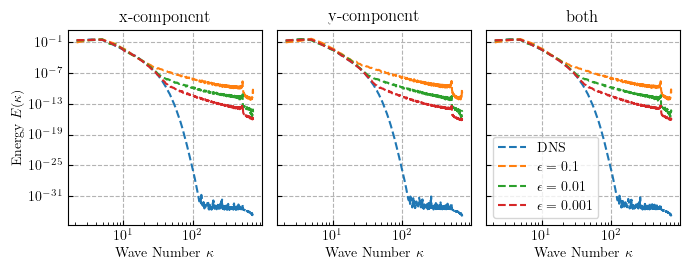

In [17]:
dx = None
n_bins = None
chi = None
fig = plt.figure(figsize=(7, 2.8))
gs = fig.add_gridspec(1, 3)
ax = gs.subplots(sharex=True, sharey=True)

X, Y, u, v = np.load("/Users/Q556220/dev/TN_CFD/2D_TDJ/quimb/energy_spectrum/DT/QIS_DNS/velocity_10_2000_1.992187500000319.npy", allow_pickle=True)
k_bin_centers, E_k_rad, E_k_1_rad, E_k_2_rad = energy_spectrum(u, v, dx, n_bins)
k_bin_size = k_bin_centers[1] - k_bin_centers[0]
print(f"Energy = {k_bin_size*np.sum(E_k_rad)}")
ax[0].plot(k_bin_centers, E_k_1_rad/np.sum(E_k_1_rad), marker='', markersize=3, ls='--')
ax[1].plot(k_bin_centers, E_k_2_rad/np.sum(E_k_2_rad), marker='', markersize=3, ls='--')
ax[2].plot(k_bin_centers, E_k_rad/np.sum(E_k_rad), marker='', markersize=3, ls='--', label=r'DNS')

k_DT_DNS = k_bin_centers
E_k_DT_DNS = E_k_rad/np.sum(E_k_rad)

# X, Y, u, v = np.load("/Users/Q556220/dev/TN_CFD/2D_TDJ/quimb/energy_spectrum/DT/QIS_DNS/velocity_10_2000_1.992187500000319.npy", allow_pickle=True)
# u = convert_to_VF2D(convert_to_MPS2D(u, chi=107))
# v = convert_to_VF2D(convert_to_MPS2D(v, chi=107))
# k_bin_centers, E_k_rad, E_k_1_rad, E_k_2_rad = energy_spectrum(u, v, dx, n_bins)
# k_bin_size = k_bin_centers[1] - k_bin_centers[0]
# print(f"Energy = {k_bin_size*np.sum(E_k_rad)}")
# ax[0].plot(k_bin_centers, E_k_1_rad/np.sum(E_k_1_rad), marker='', markersize=3, ls='--')
# ax[1].plot(k_bin_centers, E_k_2_rad/np.sum(E_k_2_rad), marker='', markersize=3, ls='--')
# ax[2].plot(k_bin_centers, E_k_rad/np.sum(E_k_rad), marker='', markersize=3, ls='--', label=r'ref $\chi = 107$')

u_mps = np.load("/Users/Q556220/dev/TN_CFD/2D_TDJ/quimb/energy_spectrum/DT/QIS_DNS/data_10_28_2000/u_time_1.99219.npy", allow_pickle=True)
v_mps = np.load("/Users/Q556220/dev/TN_CFD/2D_TDJ/quimb/energy_spectrum/DT/QIS_DNS/data_10_28_2000/v_time_1.99219.npy", allow_pickle=True)
u = convert_to_VF2D(convert_numpy_to_MPS(u_mps))
v = convert_to_VF2D(convert_numpy_to_MPS(v_mps))
k_bin_centers, E_k_rad, E_k_1_rad, E_k_2_rad = energy_spectrum(u, v, dx, n_bins)
k_bin_size = k_bin_centers[1] - k_bin_centers[0]
print(f"Energy = {k_bin_size*np.sum(E_k_rad)}")
ax[0].plot(k_bin_centers, E_k_1_rad/np.sum(E_k_1_rad), marker='', markersize=3, ls='--')
ax[1].plot(k_bin_centers, E_k_2_rad/np.sum(E_k_2_rad), marker='', markersize=3, ls='--')
ax[2].plot(k_bin_centers, E_k_rad/np.sum(E_k_rad), marker='', markersize=3, ls='--', label=r'$\epsilon=0.1$')

k_DT_QIS01 = k_bin_centers
E_k_DT_QIS01 = E_k_rad/np.sum(E_k_rad)

u_mps = np.load("/Users/Q556220/dev/TN_CFD/2D_TDJ/quimb/energy_spectrum/DT/QIS_DNS/data_10_60_2000/u_time_1.99219.npy", allow_pickle=True)
v_mps = np.load("/Users/Q556220/dev/TN_CFD/2D_TDJ/quimb/energy_spectrum/DT/QIS_DNS/data_10_60_2000/v_time_1.99219.npy", allow_pickle=True)
u = convert_to_VF2D(convert_numpy_to_MPS(u_mps))
v = convert_to_VF2D(convert_numpy_to_MPS(v_mps))
k_bin_centers, E_k_rad, E_k_1_rad, E_k_2_rad = energy_spectrum(u, v, dx, n_bins)
k_bin_size = k_bin_centers[1] - k_bin_centers[0]
print(f"Energy = {k_bin_size*np.sum(E_k_rad)}")
ax[0].plot(k_bin_centers, E_k_1_rad/np.sum(E_k_1_rad), marker='', markersize=3, ls='--')
ax[1].plot(k_bin_centers, E_k_2_rad/np.sum(E_k_2_rad), marker='', markersize=3, ls='--')
ax[2].plot(k_bin_centers, E_k_rad/np.sum(E_k_rad), marker='', markersize=3, ls='--', label=r'$\epsilon=0.01$')

k_DT_QIS001 = k_bin_centers
E_k_DT_QIS001 = E_k_rad/np.sum(E_k_rad)

u_mps = np.load("/Users/Q556220/dev/TN_CFD/2D_TDJ/quimb/energy_spectrum/DT/QIS_DNS/data_10_107_2000/u_time_1.99219.npy", allow_pickle=True)
v_mps = np.load("/Users/Q556220/dev/TN_CFD/2D_TDJ/quimb/energy_spectrum/DT/QIS_DNS/data_10_107_2000/v_time_1.99219.npy", allow_pickle=True)
u = convert_to_VF2D(convert_numpy_to_MPS(u_mps))
v = convert_to_VF2D(convert_numpy_to_MPS(v_mps))
k_bin_centers, E_k_rad, E_k_1_rad, E_k_2_rad = energy_spectrum(u, v, dx, n_bins)
k_bin_size = k_bin_centers[1] - k_bin_centers[0]
print(f"Energy = {k_bin_size*np.sum(E_k_rad)}")
ax[0].plot(k_bin_centers, E_k_1_rad/np.sum(E_k_1_rad), marker='', markersize=3, ls='--')
ax[1].plot(k_bin_centers, E_k_2_rad/np.sum(E_k_2_rad), marker='', markersize=3, ls='--')
ax[2].plot(k_bin_centers, E_k_rad/np.sum(E_k_rad), marker='', markersize=3, ls='--', label=r'$\epsilon=0.001$')
# ax[2].loglog(k_bin_centers, k_bin_centers**-3*np.log(k_bin_centers)**(-1/3), marker='o', markersize=3, ls='--')

k_DT_QIS0001 = k_bin_centers
E_k_DT_QIS0001 = E_k_rad/np.sum(E_k_rad)

# ax[2].loglog(k_bin_centers, k_bin_centers**(-5/3))

ax[0].set_xlabel(r"Wave Number $\kappa$")
ax[0].set_ylabel(r"Energy $E(\kappa)$")
# ax[0].set_ylim(ylim)
# ax[0].set_xlim(xlim)
ax[0].grid(True, ls="--", c='0.7')
ax[0].tick_params(which='both', direction="in")
ax[1].set_xlabel(r"Wave Number $\kappa$")
ax[1].tick_params(which='both', direction="in")
# ax[1].set_ylabel(r"Energy $E(\kappa)$")
# ax[1].set_ylim([1e-24, 1e12])
# ax[1].set_xlim([5e-1, 1e3])
ax[1].grid(True, ls="--", c='0.7')
ax[2].set_xlabel(r"Wave Number $\kappa$")
# ax[2].set_ylabel(r"Energy $E(\kappa)$")
# ax[2].set_ylim([1e-24, 1e12])
# ax[2].set_xlim([5e-1, 1e3])
ax[2].grid(True, ls="--", c='0.7')
ax[2].tick_params(which='both', direction="in")
ax[2].legend()

ax[0].set_yscale('log')
ax[1].set_yscale('log')
ax[2].set_yscale('log')
ax[0].set_xscale('log')
ax[1].set_xscale('log')
ax[2].set_xscale('log')

ax[0].set_title("x-component")
ax[1].set_title("y-component")
ax[2].set_title("both")
if chi is not None:
    fig.suptitle(r"$\chi = $"+f"{chi}", fontsize=14)

fig.tight_layout()
plt.show()

/var/folders/by/tjkhpdvj401cj92bnwvg228h0000gn/T/ipykernel_79430/2949487819.py:49: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


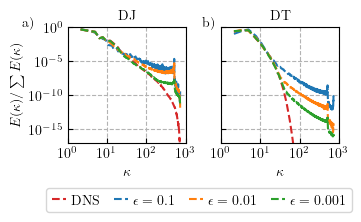

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(3.5, 1.5), sharey=True,  gridspec_kw={'wspace': 0.3})

x_min = 1e0
x_max = 1e3

# LEFT
ax[0].plot(k_DJ_DNS, E_k_DJ_DNS, marker='', ls='--', label=r"DNS", color="tab:red")
ax[0].plot(k_DJ_QIS01, E_k_DJ_QIS01, marker='', ls='--', label=r"$\epsilon=0.1$")
ax[0].plot(k_DJ_QIS001, E_k_DJ_QIS001, marker='', ls='--', label=r"$\epsilon=0.01$")
ax[0].plot(k_DJ_QIS0001, E_k_DJ_QIS0001, marker='', ls='--', label=r"$\epsilon=0.001$")
ax[0].set_xlabel(r"$\kappa$")
ax[0].set_ylabel(r"$E(\kappa)/\sum E(\kappa)$")
ax[0].xaxis.grid(True, which="major", ls="--", c='0.7')
ax[0].yaxis.grid(True, which="both", ls="--", c='0.7')
trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig.dpi_scale_trans)
ax[0].text(-0.15, 0.9, "a)", transform=ax[0].transAxes + trans, fontsize='medium', va='bottom', fontfamily='serif')
ax[0].set_yscale('log')
ax[0].set_xscale('log')
ax[0].tick_params(which='both', direction="in")
ax[0].set_ylim([1e-17, 1e0])
ax[0].set_xlim([x_min, x_max])
ax[0].set_xticks([1e0, 1e1, 1e2, 1e3])
ax[0].set_xticks([], minor=True)
ax[0].set_yticks([1e-15, 1e-10, 1e-5, 1e0], minor=False)

# RIGHT
ax[1].plot(k_DT_DNS, E_k_DT_DNS, marker='', ls='--', label=r"DNS", color="tab:red")
ax[1].plot(k_DT_QIS01, E_k_DT_QIS01, marker='', ls='--', label=r"QIS $(\epsilon=0.1)$")
ax[1].plot(k_DT_QIS001, E_k_DT_QIS001, marker='', ls='--', label=r"QIS $(\epsilon=0.01)$")
ax[1].plot(k_DT_QIS0001, E_k_DT_QIS0001, marker='', ls='--', label=r"QIS $(\epsilon=0.001)$")
ax[1].set_xlabel(r"$\kappa$")
# ax[1].set_ylabel(r"$E(\kappa)$")
ax[1].xaxis.grid(True, which="major", ls="--", c='0.7')
ax[1].yaxis.grid(True, which="both", ls="--", c='0.7')
trans = mtransforms.ScaledTranslation(-20/72, 7/72, fig.dpi_scale_trans)
ax[1].text(0.07, 0.9, "b)", transform=ax[1].transAxes + trans, fontsize='medium', va='bottom', fontfamily='serif')
ax[1].set_yscale('log')
ax[1].set_xscale('log')
ax[1].tick_params(which='both', direction="in")
ax[1].set_xlim([x_min, x_max])
ax[1].set_xticks([1e0, 1e1, 1e2, 1e3])
ax[1].set_xticks([], minor=True)
ax[1].set_yticks([1e-15, 1e-10, 1e-5, 1e0], minor=False)

ax[0].set_title(r"DJ", fontsize=10)
ax[1].set_title(r"DT", fontsize=10)

fig.legend(ax[0].get_legend_handles_labels()[0], ax[0].get_legend_handles_labels()[1], loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4, fancybox=True, handlelength=1, handletextpad=0.4, columnspacing=1)
fig.tight_layout()

plt.savefig(f"E_k_QIS.pdf", bbox_inches="tight")